In [58]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
data = pd.read_csv("wineQuality.csv", sep=';')
atributes= ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']
data[atributes] = preprocessing.MinMaxScaler().fit_transform(data[atributes])
data_train = data[data.index % 5 != 0].reset_index(drop = True)
data_validation = data[data.index % 5 == 0].reset_index(drop = True)

data_train_x = data_train[atributes].to_numpy()
data_validation_x = data_validation[atributes].to_numpy()

data_train_y = data_train[['quality']].to_numpy()
data_validation_y = data_validation[['quality']].to_numpy()
data_train_y = preprocessing.MinMaxScaler().fit_transform(data_train_y)
data_validation_y = preprocessing.MinMaxScaler().fit_transform(data_validation_y)

print(data_train_x)
print(data_train_y)
print(data_validation_x)
print(data_validation_y)

[[0.19  0.382 0.    ... 0.899 0.181 0.23 ]
 [0.345 0.492 0.159 ... 0.618 0.133 0.106]
 [0.552 0.377 0.42  ... 0.225 0.169 0.531]
 ...
 [0.172 0.427 0.182 ... 0.416 0.337 0.85 ]
 [0.241 0.216 0.318 ... 0.371 0.386 0.814]
 [0.103 0.186 0.614 ... 0.494 0.108 0.796]]
[[0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]


In [59]:
print(len(data_train_y[0]))

1


In [68]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu', input_shape = (len(data_train_x[0]), )))
model.add(tf.keras.layers.Dense(15, activation='relu' ))
model.add(tf.keras.layers.Dense(len(data_train_y[0]), activation='sigmoid'))

model.compile(tf.optimizers.RMSprop(0.01), loss='mse', metrics=['mse'])
        
history = model.fit(data_train_x, data_train_y, epochs=900, validation_data=(data_validation_x, data_validation_y))

predictions = model.predict(data_validation_x)

Epoch 1/900
19/19 [==============================] - 0s 6ms/step - loss: 0.1025 - mse: 0.1025 - val_loss: 0.0869 - val_mse: 0.0869
Epoch 2/900
19/19 [==============================] - 0s 2ms/step - loss: 0.0842 - mse: 0.0842 - val_loss: 0.0687 - val_mse: 0.0687
Epoch 3/900
19/19 [==============================] - 0s 2ms/step - loss: 0.0782 - mse: 0.0782 - val_loss: 0.0658 - val_mse: 0.0658
Epoch 4/900
19/19 [==============================] - 0s 2ms/step - loss: 0.0709 - mse: 0.0709 - val_loss: 0.0632 - val_mse: 0.0632
Epoch 5/900
19/19 [==============================] - 0s 2ms/step - loss: 0.0712 - mse: 0.0712 - val_loss: 0.0510 - val_mse: 0.0510
Epoch 6/900
19/19 [==============================] - ETA: 0s - loss: 0.0569 - mse: 0.056 - 0s 2ms/step - loss: 0.0648 - mse: 0.0648 - val_loss: 0.0659 - val_mse: 0.0659
Epoch 7/900
19/19 [==============================] - 0s 2ms/step - loss: 0.0667 - mse: 0.0667 - val_loss: 0.0484 - val_mse: 0.0484
Epoch 8/900
19/19 [==========================

minimal validation loss = 0.03717094287276268


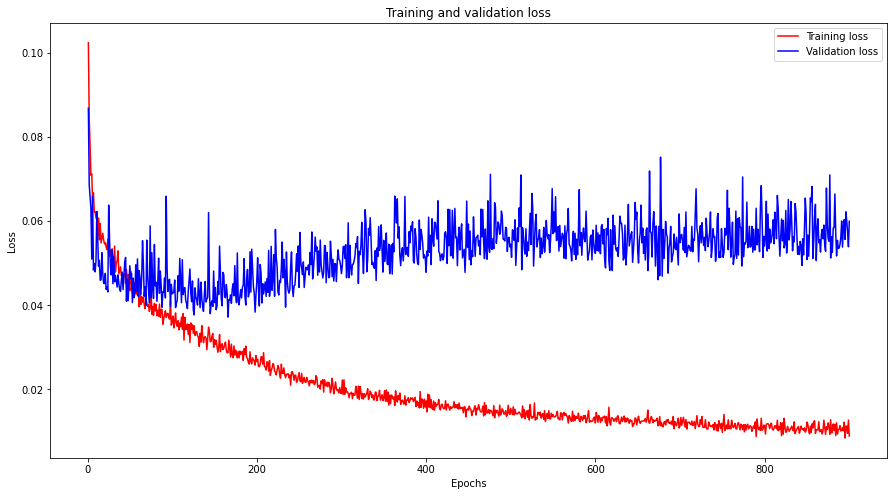

In [69]:
import matplotlib.pyplot as plt
history.history.keys()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(15,8))
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

print(f'minimal validation loss = {min(val_loss)}' )


maximal validation accuracy = 0.0868736132979393


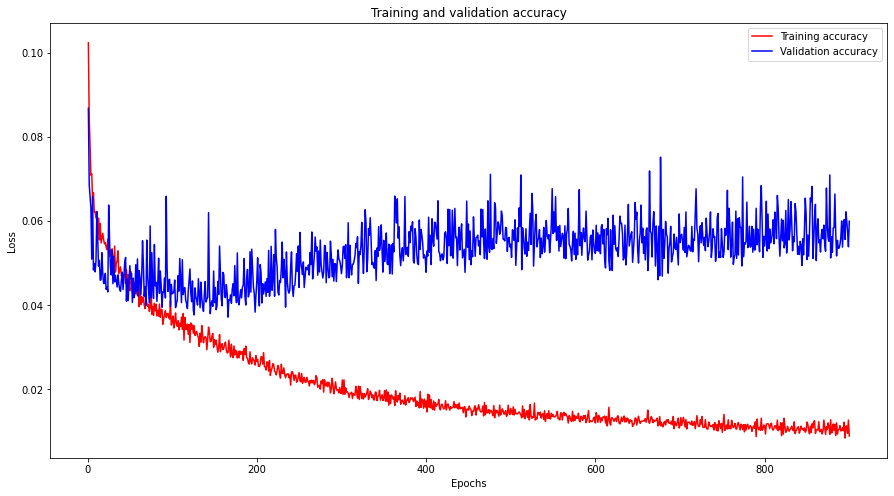

In [70]:
history.history.keys()
accuracy = history.history['mse']
val_accuracy = history.history['val_mse']
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(15,8))
plt.plot(epochs, accuracy, 'r', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

print(f'maximal validation accuracy = {max(val_accuracy)}' )


In [67]:
np.set_printoptions(precision=3, suppress=True)
for di in range(0, len(data_validation_y)):
    print(
        str(data_validation_y[di])+"\t"+
        str(predictions[di])

    )

[0.]	[0.169]
[0.]	[0.038]
[0.]	[0.24]
[0.]	[0.266]
[0.]	[0.271]
[0.]	[0.523]
[0.]	[0.098]
[0.]	[0.137]
[0.]	[0.067]
[0.]	[0.488]
[0.]	[0.067]
[0.]	[0.119]
[0.]	[0.077]
[0.]	[0.439]
[0.]	[0.419]
[0.]	[0.145]
[0.]	[0.22]
[0.]	[0.266]
[0.]	[0.369]
[0.]	[0.314]
[0.]	[0.512]
[0.]	[0.237]
[0.]	[0.076]
[0.]	[0.26]
[0.]	[0.333]
[0.]	[0.132]
[0.]	[0.077]
[0.]	[0.088]
[0.]	[0.32]
[0.]	[0.036]
[0.25]	[0.347]
[0.25]	[0.373]
[0.25]	[0.378]
[0.25]	[0.398]
[0.25]	[0.277]
[0.25]	[0.413]
[0.25]	[0.192]
[0.25]	[0.419]
[0.25]	[0.263]
[0.25]	[0.348]
[0.25]	[0.074]
[0.25]	[0.278]
[0.25]	[0.247]
[0.25]	[0.386]
[0.25]	[0.244]
[0.25]	[0.244]
[0.25]	[0.871]
[0.25]	[0.293]
[0.25]	[0.549]
[0.25]	[0.462]
[0.25]	[0.285]
[0.25]	[0.246]
[0.25]	[0.336]
[0.25]	[0.403]
[0.25]	[0.345]
[0.25]	[0.451]
[0.25]	[0.484]
[0.25]	[0.56]
[0.25]	[0.225]
[0.25]	[0.201]
[0.5]	[0.388]
[0.5]	[0.603]
[0.5]	[0.473]
[0.5]	[0.502]
[0.5]	[0.045]
[0.5]	[0.679]
[0.5]	[0.816]
[0.5]	[0.741]
[0.5]	[0.267]
[0.5]	[0.512]
[0.5]	[0.29]
[0.5]	[0.535